# **Lab 3**

In this lab, we will differentiate between audio recordings of eating chips and drinking coke by extracting and analyzing raw sound data. We will apply signal filters and calculate the spectrogram to visualize the audio frequencies. This transformation allows us to observe the distinct spectral shapes of the recordings to identify the sound source.

Note that this lab is just a brief, entry-level introduction to sound signal manipulation. There are plenty of other advanced technologies and techniques available for you to explore.

Please follow the code to finish the lab, and submit a report based on the provided template on Canvas.

In [43]:
# Scientific packages
import numpy as np
import librosa
import scipy
from scipy.signal import spectrogram, butter, filtfilt
import matplotlib.pyplot as plt

**Step 1:** Load the audio file for eating chips

In [64]:
# Load audio file
y, fs = librosa.load('food_sound_data/chips.wav')

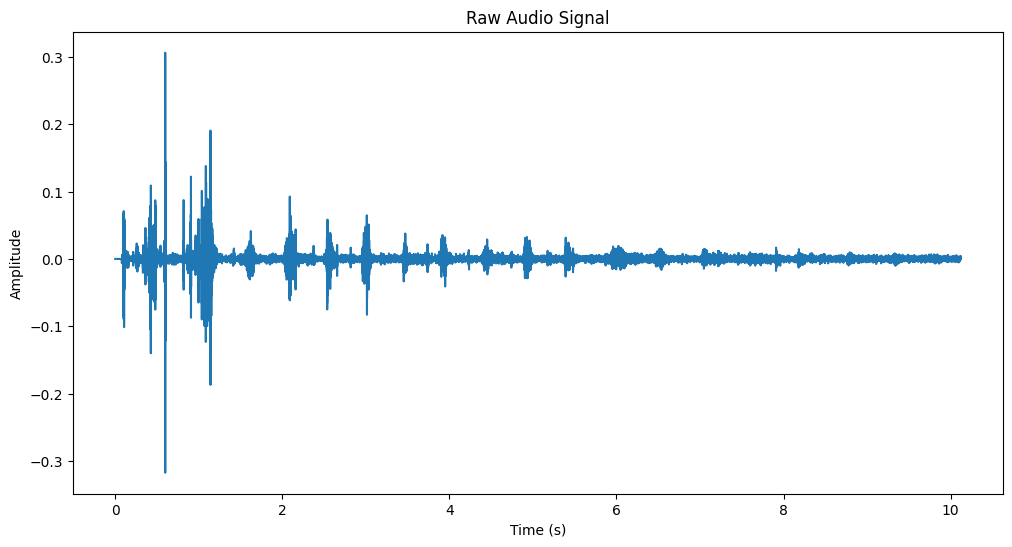

In [65]:
## Visualize the raw data
plt.figure(figsize=(12, 6))
#TODO: Plot the raw signal
plt.title('Raw Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.linspace(0, len(y) / fs, len(y)), y)
plt.show()

**Step 2:** Apply the band-pass filter, ensuring appropriate selection of the cutoff frequencies.
A good starting point for the filter range would be the human hearing range, which is from 20Hz to 20kHz. However, please also keep in mind the limitation brought by Nyquist frequency

In [77]:
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    if highcut >= nyq:
        highcut = nyq - 1
    low = lowcut / nyq
    high = highcut / nyq
    
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Apply bandpass filter
y_bandpass = bandpass_filter(y, lowcut=20, highcut=2000, fs=fs, order=5)

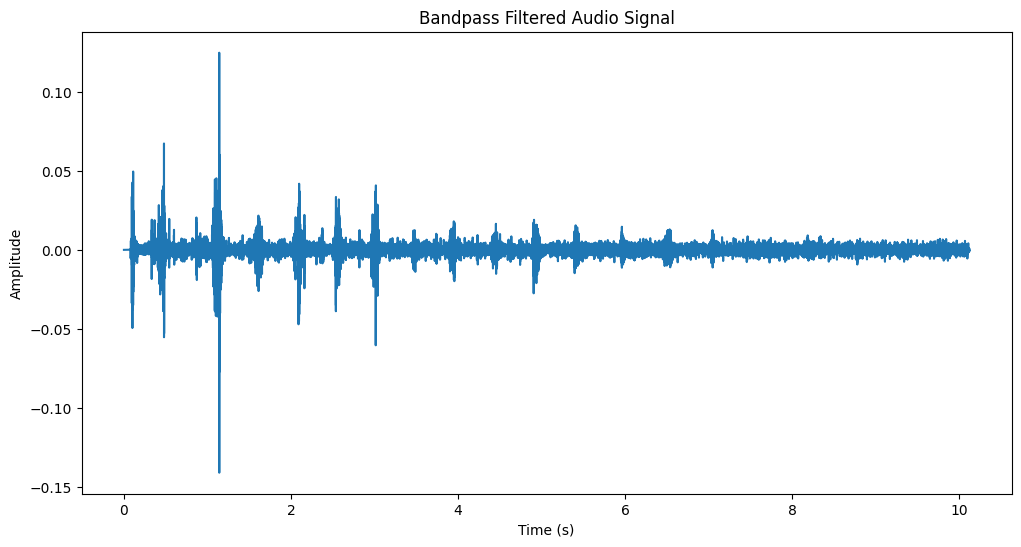

In [79]:
plt.figure(figsize=(12, 6))
plt.title('Bandpass Filtered Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.linspace(0, len(y_bandpass) / fs, len(y_bandpass)), y_bandpass)
plt.show()

**Step 3:**  Convert audio data to a spectrogram.

A spectrogram is a visual representation of the magnitude across frequencies of a signal with respect to time. The x-axis represents timestamps, the y-axis represents different frequencies, and the colormap indicates the magnitude of each frequency.

In [80]:
# Compute spectrogram
f, t, Sxx = spectrogram(y_bandpass, fs)

Plot the spectrogram to observe the frequency characteristics of the sounds.

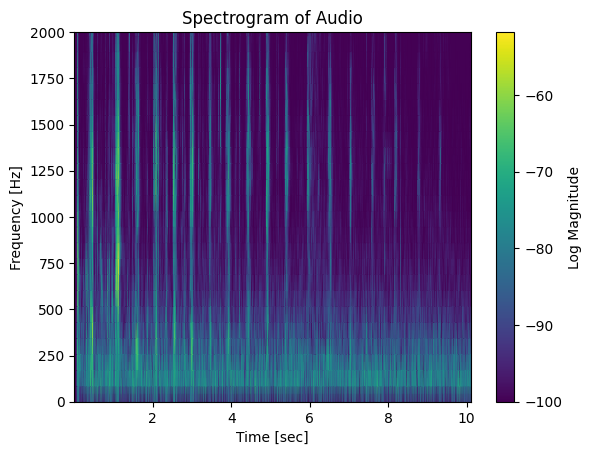

In [81]:
# Plot the spectrogram using plt.pcolormesh()
Sxx_log = 10 * np.log10(Sxx + 1e-10)  # Add small value to avoid log(0)
plt.pcolormesh(t, f, Sxx_log, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Audio')
plt.colorbar(label='Log Magnitude')
plt.ylim(0, 2000)  # Limit frequency to 2000 Hz
plt.show()

**Step 4:** Amplify specific features in the spectrogram by converting the magnitude to a Mel-spectrogram.

Mel-spectrogram differs from the standard spectrogram in that its scales are more coherant with human perception of sound differences, in both frequency and amplitude. Humans distinguish frequencies as "pitch" and amplitude as "loudness", and both are not perceived linearly but rather similar to a logarithmic scale. Therefore, the Mel-spectrogram has a y-axis unit of Mel scale instead of Hertz, and the magnitude is represented in deciBels instead of absolute magnitude. The specific calculations are as follows:

$Mel = 2595log_{10}(1+f/700)$

$dB = 20log_{10}(amp/amp_{REF})$

In [82]:
# TODO: Plot the Mel-spectrogram

# Convert frequency to Mel-scale
S = librosa.feature.melspectrogram(y=y_bandpass, sr=fs, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

Plot the Mel-spectrogram to observe the frequency characteristics of the sounds.

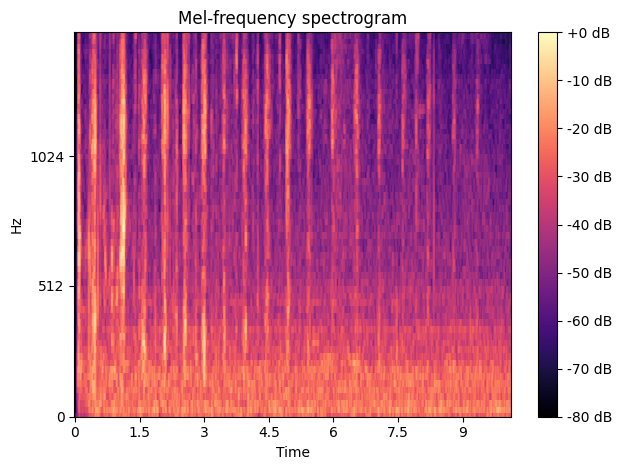

In [83]:
librosa.display.specshow(S_dB, sr=fs, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.ylim(0, 2000)
plt.show()

**Step 5:** Describe what you observed from the Spectrogram.
- What are some differences between the spectrogram and Mel-spectrogram?
- What are some traits/features in the spectrograms that can be used to describe the chip chewing

In [ ]:
# In the mel-spectrogram, there’s more energy / amplitude in the higher frequencies relative to the lower frequencies. You can see consistent lines of sound in both plots, likely due to the cyclical sound of chewing.

**Step 6:** repeat these steps for the audio of drinking soda.

In [84]:
# TODO: Repeat steps 1~5 on a different sound
# I saved notebook as script and reran on diff input file.

**Step 7:** Discuss on the differences of the spectrograms from different data. What are the unique features in each audio file and how are these features shown on spectrograms? What could be potential solutions to classify an unknown sound file automatically?

In [ ]:
# Theres a big difference between consistency and repetitiveness throughout the x-axis, which is symbolic of chewing, as opposed to the one strong sound in drinking.

**Step 8:** Based on what you found and your discussion, identify the sound in the unknown audio file.  
(Hint: if you are not sure about your answer, you could always play the audio file directly to confirm)

In [85]:
# TODO: Identify the sound in the unknown audio file.

**(Extra Credit) Step 9:** Record a chewing/drinking sound on your own and process it. Show the Mel-spectrogram figure and discuss on the similarities & differences between your own data and the provided data.

In [86]:
# TODO: Process your own recording